## Stroke Prediction Dataset 

#### Classification Problem 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### id: MALE, FEMALE & Other
##### hypertension : categorical variable (0 = No , 1 = Yes)
##### heart_disease : categorical variable (0 = No , 1 = Yes)
##### ever married : categorical variable (string)
##### work_type : different classes (string) ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed")
##### residence type: two types : (urban,rural)
##### smoking status : 4 types : ("formerly smoked", "never smoked", "smokes" or "Unknown")
##### stroke class (0= No, 1 = yes)

In [2]:
%pwd

'E:\\Data Projects\\2. Stroke Prediction'

In [3]:
data = pd.read_csv('\Data Projects/2. Stroke Prediction/healthcare-dataset-stroke-data.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data_copy = data.copy()

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Removing the Other Variable from Gender

In [9]:
data.gender.value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [10]:
data[data["gender"]=="Other"].index    # one other value which can be deleted

Int64Index([3116], dtype='int64')

In [11]:
data.drop(data[data["gender"]=="Other"].index,inplace=True)

In [12]:
data.gender.value_counts(normalize=True)

Female    0.586025
Male      0.413975
Name: gender, dtype: float64

## Converting Ever Married column into Categorical Variable

#### (No = 0 , Yes = 1)

In [13]:
data.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [14]:
data.loc[data["ever_married"]=="Yes","ever_married"]=1
data.loc[data["ever_married"]=="No","ever_married"]=0

In [15]:
data.ever_married.value_counts()      ## converted (0=No, 1=Yes)

1    3353
0    1756
Name: ever_married, dtype: int64

In [16]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


## Converting Work Type Column into Categorical variable

In [17]:
data.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [18]:
## converting working type into categorical variable
private_work=[]
self_employed_work=[]
govt_work=[]
never_work=[]
for i in data["work_type"]:
    if i=="Private":
        private_work.append(1)
    else:
        private_work.append(0)

for i in data["work_type"]:
    if i=="Self-employed":
        self_employed_work.append(1)
    else:
        self_employed_work.append(0)
for i in data["work_type"]:
    if i=="Govt_job":
        govt_work.append(1)
    else:
        govt_work.append(0)
for i in data["work_type"]:
    if i=="Never_worked":
        never_work.append(1)
    else:
        never_work.append(0)


data["private_work"]=private_work
data["self_employed_work"]=self_employed_work
data["govt_work"]=govt_work
data["never_work"]=never_work

In [19]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,private_work,self_employed_work,govt_work,never_work
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0,0,0
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,0,0
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0,0,0
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,1,0,0,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0,0


## Converting residence Type into Categorical Columns

#### ( Rural = 0 ,Urban  = 1)

In [20]:
data.residence_type.value_counts()

Urban    2596
Rural    2513
Name: residence_type, dtype: int64

In [21]:
## converting residence type into categorical variable
urban=[]
for i in data["residence_type"]:
    if i=="Urban":
        urban.append(1)
    else:
        urban.append(0)
data["urban_residence"]=urban



## Converting Gender into Categorical Columns

#### (Females = 0, Males = 1)

In [22]:
sex=[]
for i in data["gender"]:
    if i=="Male":
        sex.append(1)
    else:
        sex.append(0)
data["sex"]=sex


In [23]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0,0,0,1,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,0,0,0,0
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0,0,0,0,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,1,0,0,0,1,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0,0,0,0


## Converting Smoking Status into categorical Variables

#### ( No = 0 , Yes = 1)

In [24]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [25]:
## converting smoking status into categorical variable
smoker=[]
former_smoker=[]
never_smoker=[]

for i in data["smoking_status"]:
    if i=="smokes":
        smoker.append(1)
    else:
        smoker.append(0)

for i in data["smoking_status"]:
    if i=="formerly smoked":
        former_smoker.append(1)
    else:
        former_smoker.append(0)
for i in data["smoking_status"]:
    if i=="never smoked":
        never_smoker.append(1)
    else:
        never_smoker.append(0)


data["smoker"]=smoker
data["former_smoker"]=former_smoker
data["never_smoker"]=never_smoker

In [26]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,...,1,1,0,0,0,1,1,0,1,0
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,...,1,0,1,0,0,0,0,0,0,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,...,1,1,0,0,0,0,1,0,0,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,...,1,1,0,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,...,1,0,1,0,0,0,0,0,0,1


In [27]:
# ## bucketing the age group first for treatment of null  values of BMI

# bins = [0,12,20,30,40,50,60,70,80,90]
# labels = ["0-11","12-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
# data["agerange"]=pd.cut(data.age.values,bins,labels=labels,include_lowest=True,right=False)

In [28]:
### Bucketing Age groups is creating problems as to the data for some particular categories is to 
### low so mean is not able to catch the bigger picture

## Treatment of BMI Null Values

#### replacing null values with the mean values of approximate classes

In [29]:
data[data["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,...,1,0,1,0,0,0,0,0,0,1
8,27419,Female,59.0,0,0,1,Private,Rural,76.15,NaN,...,1,1,0,0,0,0,0,0,0,0
13,8213,Male,78.0,0,1,1,Private,Urban,219.84,NaN,...,1,1,0,0,0,1,1,0,0,0
19,25226,Male,57.0,0,1,0,Govt_job,Urban,217.08,NaN,...,1,0,0,1,0,1,1,0,0,0
27,61843,Male,58.0,0,0,1,Private,Rural,189.84,NaN,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,0,Private,Rural,70.15,NaN,...,0,1,0,0,0,0,1,0,1,0
5048,28788,Male,40.0,0,0,1,Private,Urban,191.15,NaN,...,0,1,0,0,0,1,1,1,0,0
5093,32235,Female,45.0,1,0,1,Govt_job,Rural,95.02,NaN,...,0,0,0,1,0,0,0,1,0,0
5099,7293,Male,40.0,0,0,1,Private,Rural,83.94,NaN,...,0,1,0,0,0,0,1,1,0,0


In [30]:
len(data[data["bmi"].isnull()])/len(data)*100

3.9342337052260716

In [31]:
mean_bmi = data.groupby(["gender","residence_type","work_type","ever_married","smoking_status"]).agg({"bmi":"mean"}).reset_index()

In [32]:
mean_bmi.rename(columns={"bmi":"mean_bmi"},inplace=True)

In [33]:
new_data = pd.merge(data,mean_bmi,how ="left",on=["gender","residence_type","work_type","ever_married","smoking_status"])

In [34]:
new_data[new_data['bmi'].isnull()][['id', 'gender', 'age', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'mean_bmi']]

,id,gender,age,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,mean_bmi
1,51676,Female,61.0,1,Self-employed,Rural,202.21,NaN,never smoked,1,29.732039
8,27419,Female,59.0,1,Private,Rural,76.15,NaN,Unknown,1,30.529915
13,8213,Male,78.0,1,Private,Urban,219.84,NaN,Unknown,1,30.935443
19,25226,Male,57.0,0,Govt_job,Urban,217.08,NaN,Unknown,1,27.966667
27,61843,Male,58.0,1,Private,Rural,189.84,NaN,Unknown,1,30.754118
...,...,...,...,...,...,...,...,...,...,...,...
5038,42007,Male,41.0,0,Private,Rural,70.15,NaN,formerly smoked,0,29.130769
5047,28788,Male,40.0,1,Private,Urban,191.15,NaN,smokes,0,31.076136
5092,32235,Female,45.0,1,Govt_job,Rural,95.02,NaN,smokes,0,33.185000
5098,7293,Male,40.0,1,Private,Rural,83.94,NaN,smokes,0,29.938356


In [35]:
## replacing the null values of BMI with the appropriate mean for particular class approximately 
new_data.loc[new_data["bmi"].isnull(),"bmi"] = new_data[new_data['bmi'].isnull()]["mean_bmi"].values

In [36]:
new_data.bmi.isnull().sum()

0

In [37]:
new_data.drop(columns="mean_bmi",inplace=True)

In [38]:
new_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,...,1,1,0,0,0,1,1,0,1,0
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,29.732039,...,1,0,1,0,0,0,0,0,0,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,...,1,1,0,0,0,0,1,0,0,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,...,1,1,0,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,1,Private,Urban,83.75,31.129304,...,0,1,0,0,0,1,0,0,0,1
5105,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,...,0,0,1,0,0,1,0,0,0,1
5106,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,...,0,0,1,0,0,0,0,0,0,1
5107,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,...,0,1,0,0,0,0,1,0,1,0


In [39]:
%pwd

'E:\\Data Projects\\2. Stroke Prediction'

In [40]:
## now no null values in the dataframe

new_data.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
private_work          0
self_employed_work    0
govt_work             0
never_work            0
urban_residence       0
sex                   0
smoker                0
former_smoker         0
never_smoker          0
dtype: int64

### Checking for any duplicate values (if Any)

In [41]:
## checking for duplicate values

new_data.duplicated().value_counts()   # no duplicate values

False    5109
dtype: int64

In [42]:
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,...,1,1,0,0,0,1,1,0,1,0
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,29.732039,...,1,0,1,0,0,0,0,0,0,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,...,1,1,0,0,0,0,1,0,0,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,...,1,1,0,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,1,0,1,0,0,0,0,0,0,1


# Visualsation

In [43]:
# Different Charts for Visualisation

## Checking Class imbalance
## 1. proportion of males and females
## 2. age wise distribution
## 3. gender wise work_type proportion
## 4. residence type proportion
## 6. gender wise smoking status


## 7. age wise stroke density
## 8. gender wise storke

## 10. glucose level stroke density
## 11. bmi and stroke density
## 12. femlaes and males age density
## 13. 

### Checking Class Imbalance

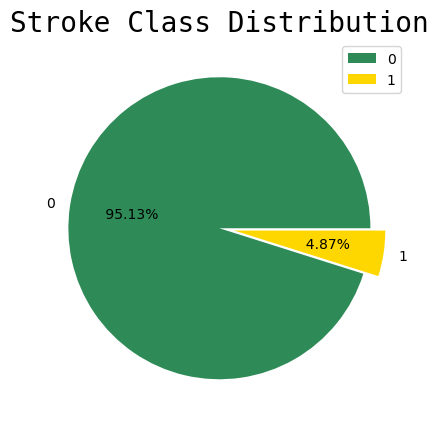

In [44]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(new_data["stroke"].value_counts(normalize=True),autopct="%6.2f%%",labels=new_data["stroke"].value_counts().index,explode=[0,0.1],colors=["seagreen","gold"])
plt.title("Stroke Class Distribution",fontfamily="monospace",fontsize="20")
plt.legend()
plt.show()

#### Proportion of Gender

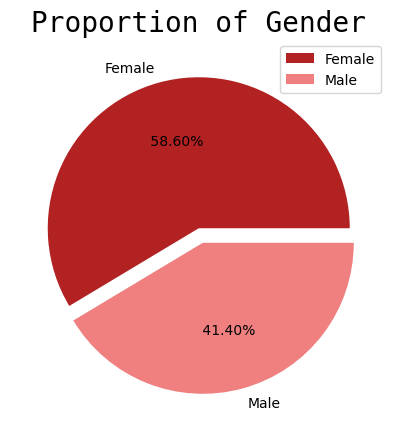

In [45]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(new_data["gender"].value_counts(normalize=True),autopct="%6.2f%%",labels=new_data["gender"].value_counts().index,explode=[0,0.1],colors=["firebrick","lightcoral"])
plt.title("Proportion of Gender",fontfamily="monospace",fontsize="20")
plt.legend()
plt.show()

### Age Distribution

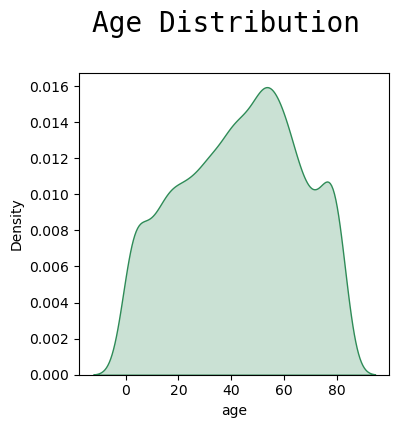

In [46]:
plt.figure(figsize=(4,4),dpi=100)
sns.kdeplot(new_data["age"],shade=True,color="seagreen")
plt.title("Age Distribution \n",fontfamily="monospace",fontsize="20")
plt.show()


### Gender Wise Work Type Distribution

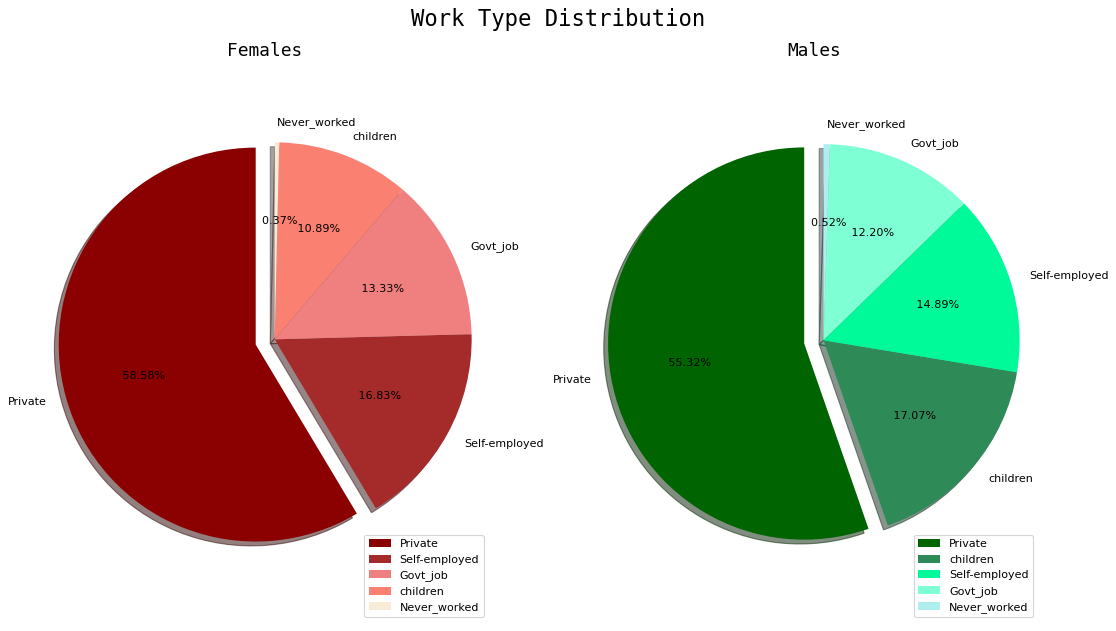

In [47]:
fig, axs = plt.subplots(nrows = 1,ncols = 2,figsize=(14,8),dpi=80)
col1 = ["darkred","brown","lightcoral","salmon","antiquewhite"]
col2 = ["darkgreen","seagreen","mediumspringgreen","aquamarine","paleturquoise"]
axs[0].pie(new_data[new_data["gender"]=="Female"]["work_type"].value_counts(normalize=True).values,autopct="%6.2f%%",labels=new_data[new_data["gender"]=="Female"]["work_type"].value_counts().index,explode=[0.1,0,0,0,0],colors=col1,shadow=True,startangle=90)
axs[1].pie(new_data[new_data["gender"]=="Male"]["work_type"].value_counts(normalize=True).values,autopct="%6.2f%%",labels=new_data[new_data["gender"]=="Male"]["work_type"].value_counts().index,explode=[0.1,0,0,0,0],colors=col2,shadow=True,startangle=90)
axs[0].set_title("Females",fontfamily="monospace",fontsize="16")
axs[1].set_title("Males",fontfamily="monospace",fontsize="16")
axs[0].legend()
axs[1].legend()
plt.suptitle("Work Type Distribution",fontfamily="monospace",fontsize="20")
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


### Proportion of Residence Type

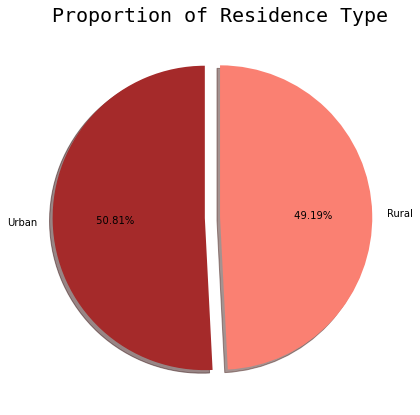

In [48]:
plt.figure(figsize=(14,7))
col = ["brown","salmon"]
plt.pie(new_data["residence_type"].value_counts(normalize=True),autopct="%6.2f%%",labels=new_data["residence_type"].value_counts().index,explode=[0.1,0],colors=col,shadow=True,startangle=90)
plt.title("Proportion of Residence Type",fontfamily="monospace",fontsize="20")
plt.show()


### Gender Wise Smoking Status

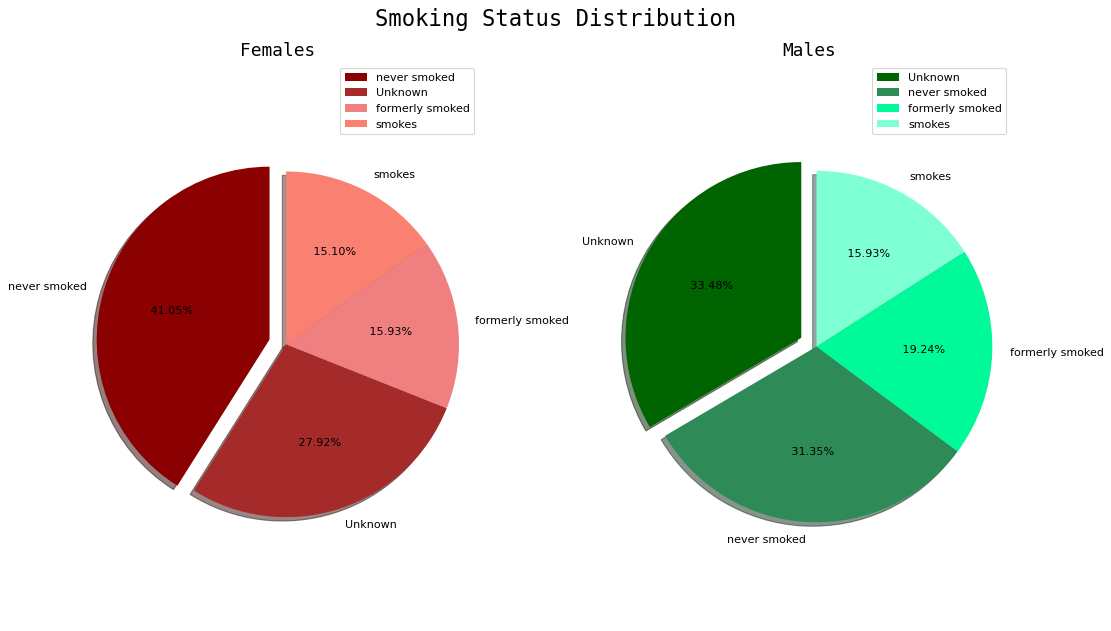

In [49]:
fig, axs = plt.subplots(nrows = 1,ncols = 2,figsize=(14,8),dpi=80)
col1 = ["darkred","brown","lightcoral","salmon"]
col2 = ["darkgreen","seagreen","mediumspringgreen","aquamarine"]
axs[0].pie(new_data[new_data["gender"]=="Female"]["smoking_status"].value_counts(normalize=True).values,autopct="%6.2f%%",labels=new_data[new_data["gender"]=="Female"]["smoking_status"].value_counts().index,explode=[0.1,0,0,0],colors=col1,shadow=True,startangle=90)
axs[1].pie(new_data[new_data["gender"]=="Male"]["smoking_status"].value_counts(normalize=True).values,autopct="%6.2f%%",labels=new_data[new_data["gender"]=="Male"]["smoking_status"].value_counts().index,explode=[0.1,0,0,0],colors=col2,shadow=True,startangle=90)
axs[0].set_title("Females",fontfamily="monospace",fontsize="16")
axs[1].set_title("Males",fontfamily="monospace",fontsize="16")
axs[0].legend()
axs[1].legend()
plt.suptitle("Smoking Status Distribution",fontfamily="monospace",fontsize="20")
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


### Relationship of Stroke and other numerical variables

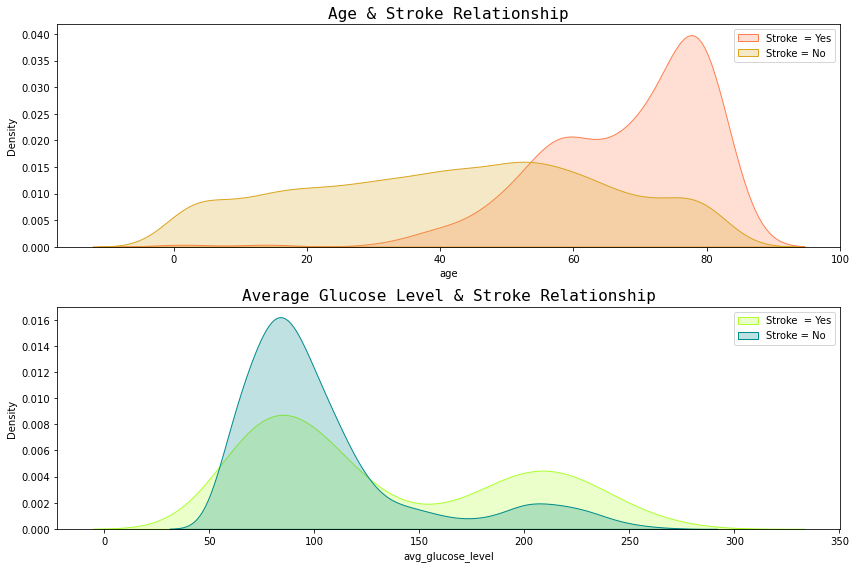

In [60]:
fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.kdeplot(new_data[new_data["stroke"]==1]["age"],ax=axs[0],color="coral",shade=True,label="Stroke  = Yes")
sns.kdeplot(new_data[new_data["stroke"]==0]["age"],ax=axs[0],color="goldenrod",shade=True,label="Stroke = No")
sns.kdeplot(new_data[new_data["stroke"]==1]["avg_glucose_level"],ax=axs[1],color="greenyellow",shade=True,label="Stroke  = Yes")
sns.kdeplot(new_data[new_data["stroke"]==0]["avg_glucose_level"],ax=axs[1],color="darkcyan",shade=True,label="Stroke = No")
axs[0].set_title("Age & Stroke Relationship",fontfamily="monospace",fontsize="16")
axs[1].set_title("Average Glucose Level & Stroke Relationship",fontfamily="monospace",fontsize="16")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()



## Gender wise Distribution of Stroke Class

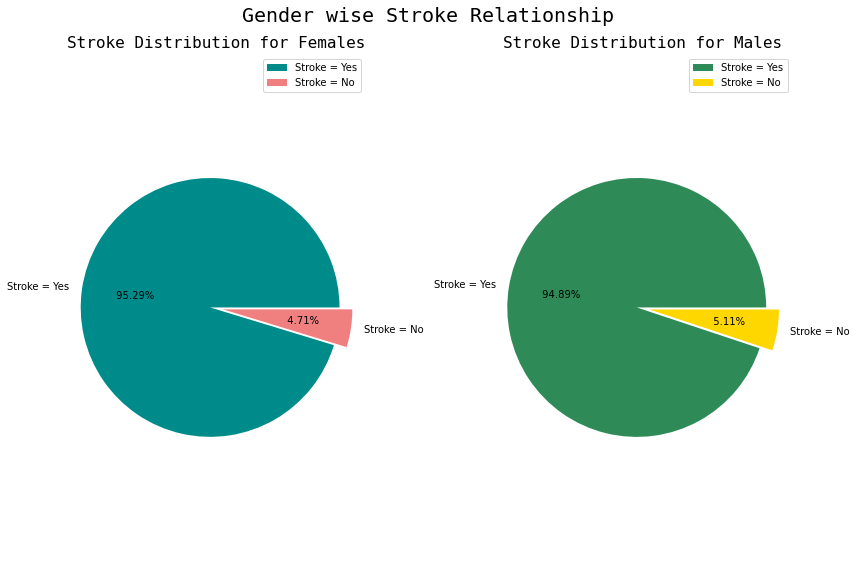

In [51]:
table = new_data.pivot_table(index = "gender",columns = "stroke" ,values= 'id',aggfunc="count")

fig , axs = plt.subplots(nrows =1,ncols = 2,figsize=(12,8))
axs[0].pie(table.loc["Female",:],autopct="%6.2f%%",labels=["Stroke = Yes","Stroke = No"],explode=[0,0.1],colors=["darkcyan","lightcoral"])
axs[1].pie(table.loc["Male",:],autopct="%6.2f%%",labels=["Stroke = Yes","Stroke = No"],explode=[0,0.1],colors=["seagreen","gold"])
axs[0].set_title("Stroke Distribution for Females",fontfamily="monospace",fontsize="16")
axs[1].set_title("Stroke Distribution for Males",fontfamily="monospace",fontsize="16")
plt.suptitle("Gender wise Stroke Relationship",fontfamily="monospace",fontsize="20")
axs[0].legend()
axs[1].legend()
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


### BMI distribution

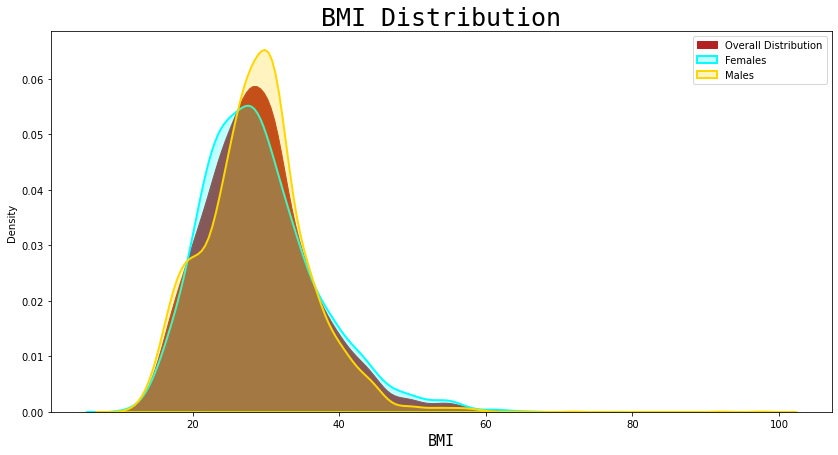

In [52]:
plt.figure(figsize=(14,7))
sns.kdeplot(new_data["bmi"],shade = True,color="firebrick",label = "Overall Distribution",alpha=1)
sns.kdeplot(new_data[new_data["gender"]=="Female"]["bmi"],shade = True,color="aqua",label="Females",linewidth=2)
sns.kdeplot(new_data[new_data["gender"]=="Male"]["bmi"],shade = True,color="gold",label="Males",linewidth=2)
plt.title("BMI Distribution",fontfamily="monospace",fontsize="25")
plt.xlabel("BMI",fontfamily="monospace",fontsize="15")
plt.legend()
plt.show()


## Correlation Between variables

In [53]:
new_data.corr()["stroke"].sort_values()

never_work           -0.014885
never_smoker         -0.004163
govt_work             0.002660
id                    0.006430
smoker                0.008920
sex                   0.009081
private_work          0.011927
urban_residence       0.015415
bmi                   0.044485
self_employed_work    0.062150
former_smoker         0.064683
hypertension          0.127891
avg_glucose_level     0.131991
heart_disease         0.134905
age                   0.245239
stroke                1.000000
Name: stroke, dtype: float64

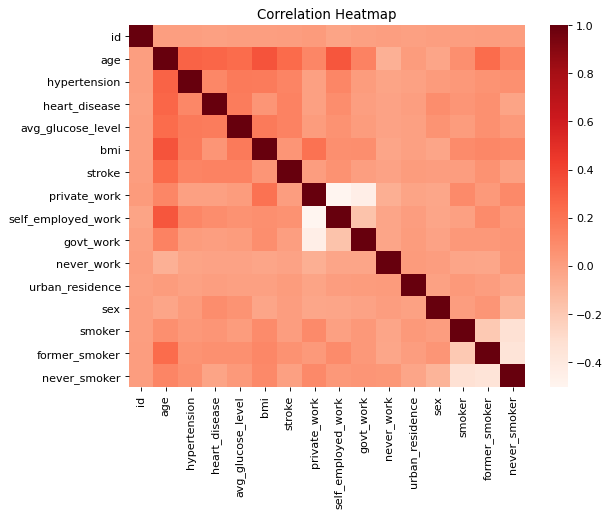

In [54]:
plt.figure(figsize=(8,6),dpi=80)
sns.heatmap(new_data.corr(),cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

# Outcome of Anlaysis

#### 1. A huge class imbalance with (Stroke 0(No) = 95.13% of Data and remaining Stroke 1(Yes))
#### 2. Slightly more Females in the study with 58.6% and 41.4% Males (Not a significant difference)
#### 3. age distibution is mostly between the middle age groups which is 40 to 60
#### 4. When compared to males more of females work in Private Sector and also in the study a huge amount of male children are present
#### 5. more or less equal proportion of residence type not a significant difference
#### 6. More or less equal proportion of gender smokes but also acknowledge the fact that more male children are present in the  data so unknown percentage is higher
#### 7. also a greater amount of females have never smoked which is also expected as females tend to smoke less than males
#### 8. Higher age groups tend to suffer from stroke more when compared to lower age groups
#### 9. but there is no significant outcome from the glucose level and stroke relationsip as nothing canbe concretely concluded
#### 10. Though more or less same proportion of people tend to have stroke 
#### 11. no significant differnece can be seen 
#### 12. the BMI is more or less distributed and the majority of the data lies between the average BMI
#### 13. we can also see the mean data for Males BMI is slighlty higher which also satisfies the fact that males tend to have a higher BMI
#### 14. amongst the variables we can see that hear disease, age , glucose level these impact the chances of stroke


# Creating the final data for the predictive analysis

In [55]:
model_data = new_data.drop(columns = ["id","gender","work_type","residence_type","smoking_status"])

In [56]:
model_data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
0,67.0,0,1,1,228.69,36.600000,1,1,0,0,0,1,1,0,1,0
1,61.0,0,0,1,202.21,29.732039,1,0,1,0,0,0,0,0,0,1
2,80.0,0,1,1,105.92,32.500000,1,1,0,0,0,0,1,0,0,1
3,49.0,0,0,1,171.23,34.400000,1,1,0,0,0,1,0,1,0,0
4,79.0,1,0,1,174.12,24.000000,1,0,1,0,0,0,0,0,0,1


In [57]:
%pwd

'E:\\Data Projects\\2. Stroke Prediction'

In [58]:
model_data.to_csv("E:\\Data Projects\\2. Stroke Prediction\\model_data.csv")